In [20]:
import pandas as pd
batting = {'Rohit Sharma':['Not Out', 100], 'Virat Kohli':['Not Out', 150], 'Sachin Tendulkar':['Out', 100]}
index = ['Dismissal', 'Runs']

In [21]:
batting_df = pd.DataFrame(data = batting, index = index)

In [22]:
batting_df

,Rohit Sharma,Virat Kohli,Sachin Tendulkar
Dismissal,Not Out,Not Out,Out
Runs,100,150,100


In [23]:
batting_df_final = batting_df.T
#batting_df_final.rename(columns={'Dismissal', 'Runs'})
batting_df_final

,Dismissal,Runs
Rohit Sharma,Not Out,100
Virat Kohli,Not Out,150
Sachin Tendulkar,Out,100


In [24]:
batting_df_final.columns

Index(['Dismissal', 'Runs'], dtype='object')

In [46]:
names = ['Rohit Sharma', 'Virat Kohli', 'Sachin Tendulkar']
# dismissal = {'dismissal' : ['Not Out', 'Not Out', 'Out']}
# runs = {'runs' : [100, 150, 100]}
data = {'dismissal' : ['Not Out', 'Not Out', 'Out'], 'runs' : [100, 150, 100]}

In [47]:
batting_df_v2 = pd.DataFrame(data, index = names) 
batting_df_v2

,dismissal,runs
Rohit Sharma,Not Out,100
Virat Kohli,Not Out,150
Sachin Tendulkar,Out,100


In [50]:
!ls ./Datasets/CovidIndia/

AgeGroupDetails.csv             StatewiseTestingDetails.csv
HospitalBedsIndia.csv           covid_19_india.csv
ICMRTestingLabs.csv             population_india_census2011.csv
IndividualDetails.csv


In [51]:
covid_data = pd.read_csv('Datasets/CovidIndia/covid_19_india.csv')

In [82]:
set(covid_data['State/UnionTerritory'])

{'Andaman and Nicobar Islands',
 'Andhra Pradesh',
 'Arunachal Pradesh',
 'Assam',
 'Bihar',
 'Cases being reassigned to states',
 'Chandigarh',
 'Chhattisgarh',
 'Dadar Nagar Haveli',
 'Dadra and Nagar Haveli and Daman and Diu',
 'Daman & Diu',
 'Delhi',
 'Goa',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jammu and Kashmir',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Ladakh',
 'Madhya Pradesh',
 'Maharashtra',
 'Manipur',
 'Meghalaya',
 'Mizoram',
 'Nagaland',
 'Odisha',
 'Puducherry',
 'Punjab',
 'Rajasthan',
 'Sikkim',
 'Tamil Nadu',
 'Telangana',
 'Telangana***',
 'Telengana',
 'Telengana***',
 'Tripura',
 'Unassigned',
 'Uttar Pradesh',
 'Uttarakhand',
 'West Bengal'}

In [53]:
covid_data.shape

(5861, 9)

In [54]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861 entries, 0 to 5860
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       5861 non-null   int64 
 1   Date                      5861 non-null   object
 2   Time                      5861 non-null   object
 3   State/UnionTerritory      5861 non-null   object
 4   ConfirmedIndianNational   5861 non-null   object
 5   ConfirmedForeignNational  5861 non-null   object
 6   Cured                     5861 non-null   int64 
 7   Deaths                    5861 non-null   int64 
 8   Confirmed                 5861 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 412.2+ KB


In [55]:
covid_data.describe()

,Sno,Cured,Deaths,Confirmed
count,5861.000000,5861.000000,5861.000000,5861.000000
mean,2931.000000,15557.303020,495.068418,22840.067395
std,1692.069295,48801.548859,1902.215575,68013.757958
min,1.000000,0.000000,0.000000,0.000000
25%,1466.000000,18.000000,0.000000,70.000000
50%,2931.000000,559.000000,9.000000,1403.000000
75%,4396.000000,6414.000000,175.000000,11088.000000
max,5861.000000,584537.000000,24903.000000,808306.000000


In [56]:
covid_data.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [77]:
covid_Delhi = covid_data[covid_data['State/UnionTerritory'] == 'Delhi'].reset_index()
covid_Delhi['Active'] = covid_Delhi["Confirmed"] - covid_Delhi["Cured"] - covid_Delhi["Deaths"]
covid_Delhi

,index,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,34,35,02/03/20,6:00 PM,Delhi,1,0,0,0,1,1
1,38,39,03/03/20,6:00 PM,Delhi,1,0,0,0,1,1
2,42,43,04/03/20,6:00 PM,Delhi,1,0,0,0,1,1
3,45,46,05/03/20,6:00 PM,Delhi,2,0,0,0,2,2
4,51,52,06/03/20,6:00 PM,Delhi,3,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...
180,5694,5695,29/08/20,8:00 AM,Delhi,-,-,151473,4389,169412,13550
181,5729,5730,30/08/20,8:00 AM,Delhi,-,-,152922,4404,171366,14040
182,5764,5765,31/08/20,8:00 AM,Delhi,-,-,154171,4426,173390,14793
183,5799,5800,01/09/20,8:00 AM,Delhi,-,-,155678,4444,174748,14626


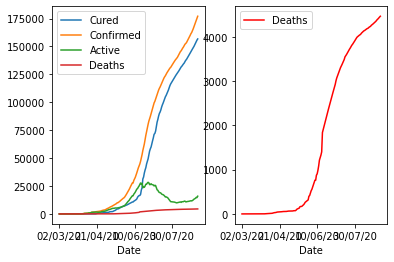

In [79]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2)

covid_Delhi.plot(x = "Date", y=["Cured", "Confirmed", "Active", "Deaths"], ax = axes[0])


covid_Delhi.plot(x = "Date", y="Deaths", ax = axes[1], color='r')

In [83]:
covid_Maha = covid_data[covid_data['State/UnionTerritory'] == 'Maharashtra'].reset_index()
covid_Maha['Active'] = covid_Maha["Confirmed"] - covid_Maha["Cured"] - covid_Maha["Deaths"]
covid_Maha

,index,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,76,77,09/03/20,6:00 PM,Maharashtra,2,0,0,0,2,2
1,91,92,10/03/20,6:00 PM,Maharashtra,5,0,0,0,5,5
2,97,98,11/03/20,6:00 PM,Maharashtra,2,0,0,0,2,2
3,120,121,12/03/20,6:00 PM,Maharashtra,11,0,0,0,11,11
4,133,134,13/03/20,6:00 PM,Maharashtra,14,0,0,0,14,14
...,...,...,...,...,...,...,...,...,...,...,...
173,5705,5706,29/08/20,8:00 AM,Maharashtra,-,-,543170,23775,747995,181050
174,5740,5741,30/08/20,8:00 AM,Maharashtra,-,-,554711,24103,764281,185467
175,5775,5776,31/08/20,8:00 AM,Maharashtra,-,-,562401,24399,780689,193889
176,5810,5811,01/09/20,8:00 AM,Maharashtra,-,-,573559,24583,792541,194399


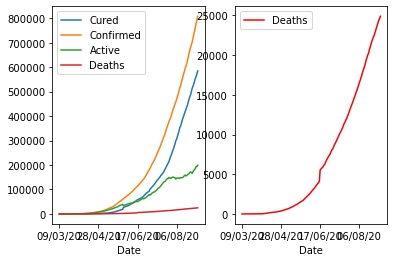

In [85]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2)

covid_Maha.plot(x = "Date", y=["Cured", "Confirmed", "Active", "Deaths"], ax = axes[0])


covid_Maha.plot(x = "Date", y="Deaths", ax = axes[1], color='r')

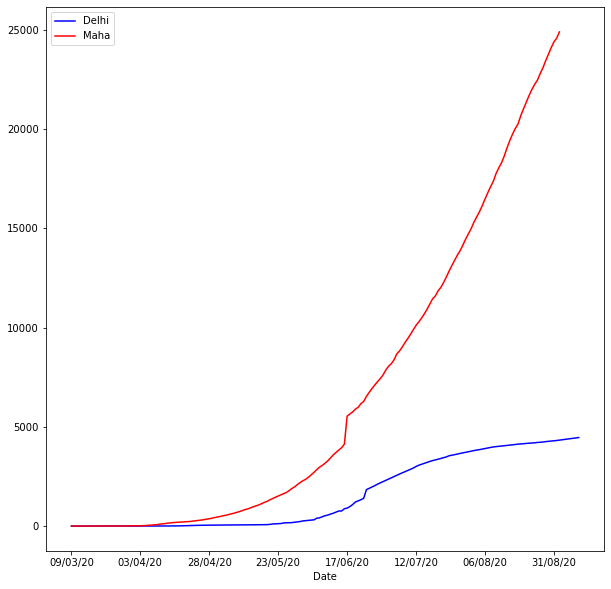

In [102]:
import matplotlib.pyplot as plt
#plt.figure(figsize = (15,15))
fig, axes = plt.subplots(1, figsize=(10,10))
covid_Delhi.plot(x = "Date", y="Deaths", ax = axes, color='b', label = 'Delhi')
covid_Maha.plot(x = "Date", y="Deaths", ax = axes, color='r', label = 'Maha')


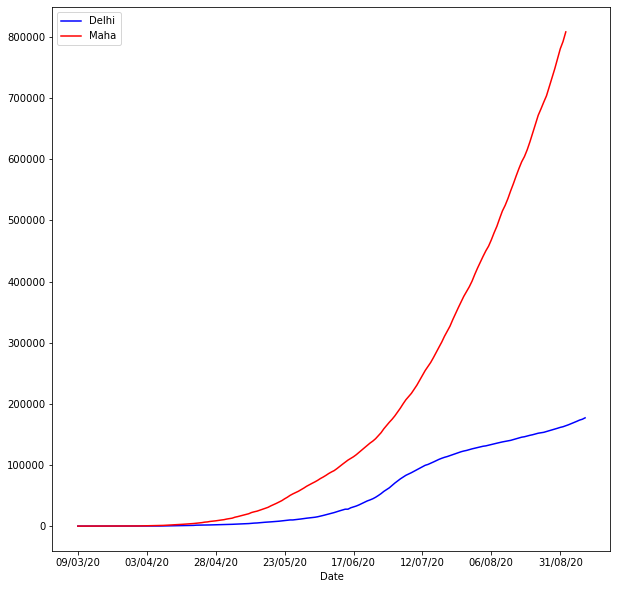

In [105]:
import matplotlib.pyplot as plt
#plt.figure(figsize = (15,15))
fig, axes = plt.subplots(1, figsize=(10,10))
covid_Delhi.plot(x = "Date", y="Confirmed", ax = axes, color='b', label = 'Delhi')
covid_Maha.plot(x = "Date", y="Confirmed", ax = axes, color='r', label = 'Maha')